This notebook is part of the tutorials materials to Spatial Mapping of b-vlaue of earthquakes

### Spatial Mapping of b-value of earthquakes at Salton Trough and Imperial Valley, Southern California ###

The earthquake size distribution can be described by a power-law with an exponent \( b \), which shows the Gutenberg-Richter relationship (Gutenberg & Richter, 1944):

$$ \log(N) = a - bM $$

Where $b$ is the slope of the number of events $N$ with greater than magnitude $M$ provides the seismic activity and $a$ provides productivity. The $b$-value will be computed using the maximum-likelihood estimator (Aki, 1965; Bender, 1983; Utsu, Ogata, S, & Matsu’ura, 1995):
$$\ b = \frac{1}{{\bar{M} - M_c}} \log_{10}(e) \quad$$
Where $\bar{M}$ is the mean magnitude, $e=\exp(1)$, and $M_c$ is the magnitude of completeness adjusted for bin size to account for potential bin size biases (Guo & Ogata, 1997; Utsu et al., 1995). We will estimate the magnitude of completeness using the maximum curvature method. The statistical uncertainty for maximum likelihood b-value estimates can be determined from (Shi & Bolt, 1982).
$$ \sigma _b = \frac{b^2}{\log(e)} \sqrt{\frac{\sum_{i=1}^{n} (M_i - \bar{M})}{n(n-1)}} \quad $$
Where n is the number of events above $M_c$, $M_i$ is the magnitude of individual AE events and $\bar{M}$ is the mean magnitude for events greater or equal than $M_c$.

The b-value in Gutenberg-Richter relation is a crucial parameter in earthquake seismology that is obtained from the Gutenberg-Richter frequency-magnitude distribution. The b-value is the defined by the slope of magnitude frequency distribution of earthquakes and is independent of whether global, regional or local seismicity in analyzed (Fiedler, Hainzl, Z ̈oller, & Holschneider, 2018-10-01).

### Instructions for Defining the Region of Interest for Earthquake Analysis ###
To define the region of interest for example, the Salton Trough/Imperial Valley area, you need to specify the following parameters:

#### Geographic Boundaries: ####
- Minimum Latitude = 32.00 
- Maximum Latitude = 36.00
- Minimum Longitude = -120.0
- Maximum Longitude = -111.0
#### Earthquake Characteristics: ####
- Minimum Magnitude = -1.0
- Maximum Magnitude = 9.0
- Minimum Depth  = -5.0
- Maximum Depth  = 30.0
#### Time Boundaries: ####
- Start Time = 1977:01:01:00
- End Time   = 2024:06:07:00 (Today)

use above information when accessing earthquake catalog data. you can excess catalog data from Southern California Earthquake Data Center (SCEDC) from [here](https://service.scedc.caltech.edu/eq-catalogs/date_mag_loc.php) After accessing data you can save under the data directory. 


### 1. Import required  and packages ###

In [3]:
import os
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygmt #for plotting purposes

### 2. Managae input output directories ###

In [4]:
path = os.getcwd()
dataDir  = os.path.join(path, "data",)
plotDir= os.path.join(path, "plots")
if not os.path.exists(plotDir):
    os.mkdir(plotDir)
    print(f"Created Output Directory: {plotDir}")
else:
    print("Output Directory already exists.")

Created Output Directory: /Users/nthapa/WORK/pybvalue/example/plots


### Alterntive way to download earthquakes catalog data ###

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import csv

# Initialize the client (for the Southern California Earthquake Data Center (SCEDC))
client = Client("SCEDC")

# Define the output CSV file name
output_csv = "data/event_catalog.csv"

# Define the parameters for the catalog search
start_time = UTCDateTime("2022-01-01")
end_time = UTCDateTime("2022-12-31")
min_magnitude = 3.0
max_magnitude = 6.0
min_latitude = 32.0
max_latitude = 36.0
min_longitude = -120.0
max_longitude = -114.0
min_depth = 0.0
max_depth = 30.0

try:
    # Fetch the catalog data using the specified parameters
    catalog = client.get_events(starttime=start_time, endtime=end_time,
                                minmagnitude=min_magnitude, maxmagnitude=max_magnitude,
                                minlatitude=min_latitude, maxlatitude=max_latitude,
                                minlongitude=min_longitude, maxlongitude=max_longitude,
                                mindepth=min_depth, maxdepth=max_depth)
    
    # Print the number of events in the catalog
    print(f"Number of events in the catalog: {len(catalog)}")
    

    # Write the event details to the CSV file
    with open(output_csv, mode='w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        # Write the header
        csv_writer.writerow(["EventID", "OriginTime", "Magnitude", "Latitude", "Longitude", "Depth"])
        
        # Iterate over the events and write the details for each event
        for event in catalog:
            # Extract the event ID by splitting the URI
            event_id = event.resource_id.id.split('=')[-1]
            origin = event.origins[0]
            magnitude = event.magnitudes[0].mag
            csv_writer.writerow([event_id, origin.time, magnitude, origin.latitude, origin.longitude, origin.depth / 1000])
    
    print(f"Seismic event catalog has been saved to {output_csv}")

except Exception as e:
    print(f"An error occurred: {e}")


Number of events in the catalog: 92
Seismic event catalog has been saved to data/event_catalog.csv


### 3. Load the event catalog downloaded from step 1 ###

In [5]:
catalogFilename = os.path.join(path, "data","1977_20240611.txt")

In [12]:
headerName = [ "date", "time", "ET", "GT", "magnitude", "M", "latitude", "longitude", "depth", "Q", "EVID", "NPH", "NGRM",]
catalog_df = pd.read_csv(
    catalogFilename,
    delim_whitespace=True,
    header=0,
    names=headerName,
    comment="#",
    index_col=False,
    skiprows=1,
)

print(f"Total Number of Events: {len(catalog_df)}")
catalog_df.head(2)

/var/folders/09/sym4zj957ln771hnm71vn5380000gn/T/ipykernel_8886/227422132.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  catalog_df = pd.read_csv(


Total Number of Events: 450438


date         time  ET GT  magnitude  M  latitude  longitude  depth  \
0  1977/01/01  04:39:33.12  eq  l        1.6  h  32.80883 -115.50333    6.8   
1  1977/01/01  15:40:22.57  eq  l        2.0  h  32.46200 -115.39450    6.0   

   Q       EVID  NPH  NGRM  
0  C  3332249.0  8.0  13.0  
1  C  3332252.0  9.0  13.0

### Plot earthquke catalog in map ###

In [22]:
# Legend for magnitude size plot in pygmt
# find magnitude limits for a legend
mag_min = 2 
mag_max = 6
mags = range(mag_min, mag_max)
mag_sym_size = [0.02 * 2 ** m for m in mags]
sio = open('quake_mag_sym.txt','w')    # NOTE: must use actual file with PyGMT
for mag,ms in zip(mags,mag_sym_size):
    if ms > 4.0:    # need extra space above big symbol_ex
        sio.write('G 10l\n')

    sio.write('S 0.1i c %.1f none 0.50p 0.3i M=%d\n' % (ms,mag))
#sio.seek(0)
sio.close()

plot [ERROR]: Colorname none not recognized!
plot [ERROR]: Colorname none not recognized!
plot [ERROR]: Colorname none not recognized!
plot [ERROR]: Colorname none not recognized!


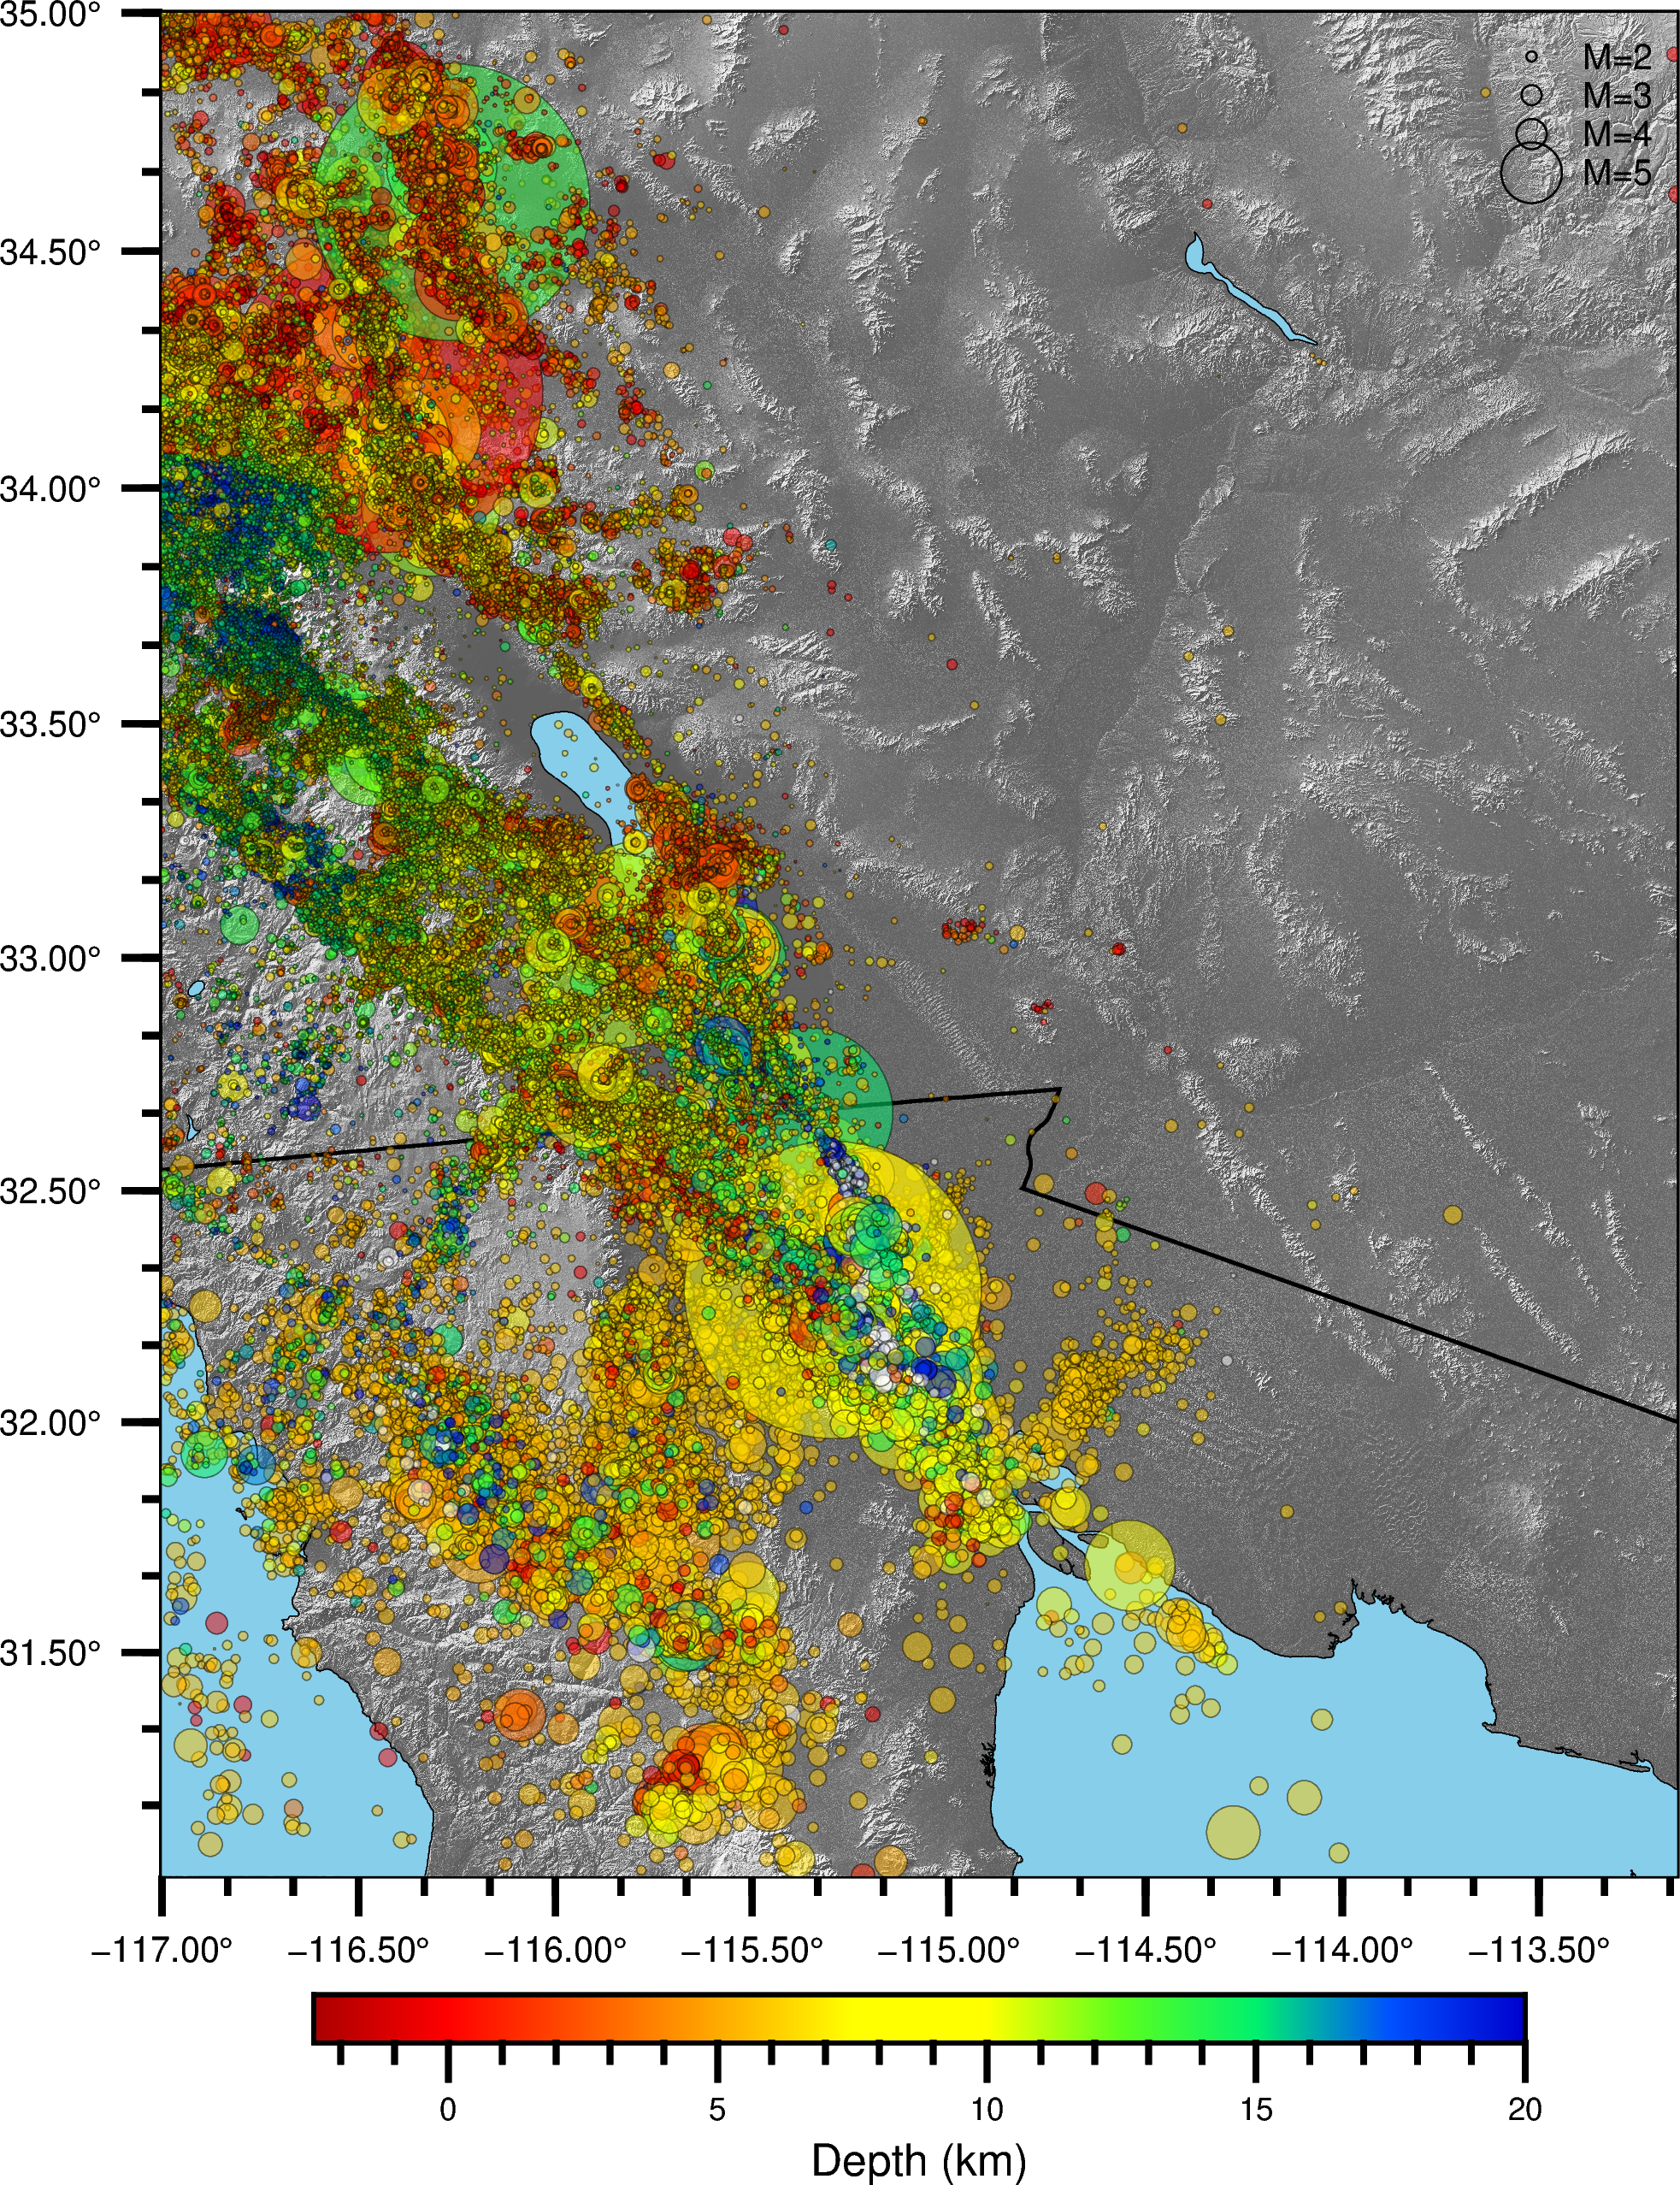

In [23]:
#Define Region for plotting from data
region = [
    catalog_df.longitude.min(), 
    catalog_df.longitude.max(),
    catalog_df.latitude.min(),
    catalog_df.latitude.max(),
]

topo = "@earth_relief_01s"
grid_map = pygmt.datasets.load_earth_relief(
    resolution="01s",
    region=region,
)

fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(MAP_ANNOT_OFFSET="0.2c") 
pygmt.config(MAP_TICK_LENGTH="0.4c") 
pygmt.config(MAP_TICK_PEN="0.07c") 

fig.basemap(region=region, projection="M15c", frame=True,)
land = fig.grdimage(grid=grid_map, cmap="grayC", shading=True)
fig.coast(land=land,   borders=["1/1p,black"], water='skyblue', shorelines=True, resolution='f')
pygmt.makecpt(cmap="seis", series=[catalog_df.depth.min(), 20 ])

fig.plot(
    x=catalog_df.longitude,
    y=catalog_df.latitude,
    size=0.02 * (2**catalog_df.magnitude),
    fill=catalog_df.depth,
    cmap=True,
    style="cc",
    pen="black",
    transparency=50,
    )
fig.colorbar(frame="af+lDepth (km)")
# Legend in the upper right
fig.legend(spec='quake_mag_sym.txt', position="jTR+o0.1c")
fig.savefig(plotDir + 'Salton_Trough_Seismicity.pdf', dpi=600)
fig.show()
